### Exploring ASV

In [1]:
import pandas as pd
import os

os.chdir('C:/Users/dalto/OneDrive/Pictures/Documents/Projects/Coding Projects/Biomechanics/data/')

pitch_level_612 = pd.read_csv('./full/pitch_25.csv')
swing_value = pd.read_csv('./full/swing_values_25.csv').drop(columns=['Unnamed: 0'])
full = pd.read_csv('./full/merged_data.csv')

In [2]:
swing_value = pd.read_csv('./full/swing_values_25.csv').drop(columns=['Unnamed: 0'])
swing_value = swing_value[(swing_value['game_date'] == 2024) | (swing_value['game_date'] == 2025)]
swing_value = swing_value[swing_value['pitch_count'] > 250]
diffs = swing_value.groupby('batter').diff(1)
diffs['name'] = swing_value['batter']
diffs = diffs.dropna()

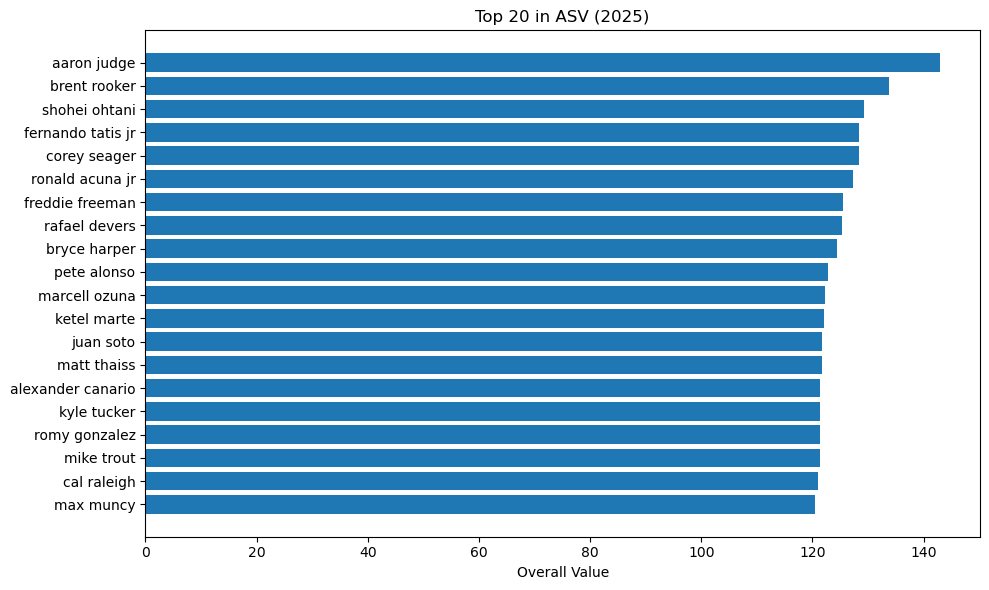

In [3]:
import matplotlib.pyplot as plt

top20_2025 = swing_value[swing_value['game_date'] == 2025]
top20_2025 = top20_2025.nlargest(20, 'overall_value')
plt.figure(figsize=(10, 6))
plt.barh(top20_2025['batter'], top20_2025['overall_value'])
plt.xlabel('Overall Value')
plt.title('Top 20 in ASV (2025)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()